https://public.tableau.com/profile/rohit.saha2913#!/vizhome/shared/4CS38CSPJ

# Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tqdm import tqdm

# Data

In [4]:
data = pd.read_csv('../data/ODI.csv')

In [5]:
data

,Match,Date,Versus,Ground,How Dismissed,Runs,B/F,S/R,Aggr,Avg,S/R.1
0,1,03-04-1996,Sri Lanka,Padang Cricket Ground,c †R S Kaluwitharana b M Muralitharan,3,4,75,3,3.00,75.00
1,2,05-04-1996,Pakistan,Padang Cricket Ground,run out,4,7,57.14,7,3.50,63.64
2,3,12-04-1996,Pakistan,Sharjah Cricket Stadium,c †Rashid Latif b Mushtaq Ahmed,3,5,60,10,3.33,62.50
3,4,14-04-1996,South Africa,Sharjah Cricket Stadium,c J N Rhodes b S M Pollock,11,21,52.38,21,5.25,56.76
4,5,26-05-1996,England,Old Trafford,not out,22*,15,146.67,43,10.75,82.69
5,6,28-08-1996,Sri Lanka,R Premadasa Stadium,not out,7*,4,175,50,12.50,89.29
6,7,01-09-1996,Zimbabwe,Sinhalese Sports Club Ground,did not bat,-,-,-,50,12.50,89.29
7,8,06-09-1996,Australia,Sinhalese Sports Club Ground,b P R Reiffel,13,25,52,63,12.60,77.78
8,9,16-09-1996,Pakistan,"Cricket, Skating & Curling Club",c Aamir Sohail b Saleem Malik,39,50,78,102,17.00,77.86
9,10,17-09-1996,Pakistan,"Cricket, Skating & Curling Club",b Saqlain Mushtaq,90,114,78.95,192,27.43,78.37


**HIGHER LEVEL SUMMARY**

In [6]:
def runs_balls_clean(x):
    if x.endswith('*'):
        return int(x[:-1])
    if x == '-':
        return 0
    else:
        return int(x)

In [7]:
pd.DataFrame({
    'Matches': [len(data)],
    'Innings': [len(data)-data['How Dismissed'].value_counts()['did not bat']],
    'Not Outs': [data['How Dismissed'].value_counts()['not out']],
    'Aggregate': [data['Aggr'][len(data)-1]],
    'Highest Score': [data['Runs'].apply(runs_balls_clean).max()],
    'Average': [data['Avg'][len(data)-1]],
    '50s': [len(data[(data['Runs'].apply(runs_balls_clean) >=50) & (data['Runs'].apply(runs_balls_clean) < 100)])],
    '100s': [len(data[data['Runs'].apply(runs_balls_clean) >= 100])],
    'Ducks': [len(data[data['Runs'] == '0'])],
    'Scoring Rate': [data['S/R.1'][len(data)-1]],
    '4s': [950],
    '6s': [42]
}).to_json('../data/ODI-Highlights.json')

**PERFORMANCE AGAINST TEAMS**

In [8]:
def out(x):
    return 0 if x in ['not out', 'did not bat'] else 1

In [ ]:
_ = pd.DataFrame()
for c in data['Versus'].unique():
    print(c)
    d_ = data[data['Versus'] == c].reset_index(drop=True)
    d_['B/F.1'] = 0
    d_['B/F.1'][0] = runs_balls_clean(d_['B/F'][0])
    d_['Out Count'] = 0
    d_['Out Count'][0] = out(d_['How Dismissed'][0])
    d_['Aggr'][0] = runs_balls_clean(d_['Runs'][0])
    d_['Avg'][0] = round(d_['Aggr'][0]/d_['Out Count'][0], 2)
    for i in range(1, len(d_)):
        d_['Aggr'][i] = d_['Aggr'][i-1]+runs_balls_clean(d_['Runs'][i])
        d_['B/F.1'][i] = d_['B/F.1'][i-1]+runs_balls_clean(d_['B/F'][i])
        d_['S/R.1'][i] = round(d_['Aggr'][i]/d_['B/F.1'][i]*100, 2)
        d_['Out Count'][i] = d_['Out Count'][i-1]+out(d_['How Dismissed'][i])
        d_['Avg'][i] = round(d_['Aggr'][i]/d_['Out Count'][i], 2)
    d_.to_csv(f'../data/ODI-{c}.csv')
    try:
        inns = len(d_)-d_['How Dismissed'].value_counts()['did not bat']
    except:
        inns = len(d_)
    try:
        no = d_['How Dismissed'].value_counts()['not out']
    except:
        no = 0
    df_ = pd.DataFrame({
        'Country': [c],
        'Matches': [len(d_)],
        'Innings': [inns],
        'Not Outs': [no],
        'Aggregate': [d_['Aggr'][len(d_)-1]],
        'Highest Score': [d_['Runs'].apply(runs_balls_clean).max()],
        'Average': [round(d_['Avg'][len(d_)-1], 2)],
        '50s': [len(d_[(d_['Runs'].apply(runs_balls_clean) >=50) & (d_['Runs'].apply(runs_balls_clean) < 100)])],
        '100s': [len(d_[d_['Runs'].apply(runs_balls_clean) >= 100])],
        'Ducks': [len(d_[d_['Runs'] == '0'])],
        'Scoring Rate': [d_['S/R.1'][len(d_)-1]],
    })
    _ = pd.concat([_, df_])
    df_.to_json(f'../data/ODI-{c}-Highlights.json')

Sri Lanka


In [10]:
_ = _.sort_values('Matches', ascending=False)
_ = _.reset_index(drop=True)

In [11]:
_

,Country,Matches,Innings,Not Outs,Aggregate,Highest Score,Average,50s,100s,Ducks,Scoring Rate
0,Pakistan,58,55,3,1899,107,36.520000,14,2,3,67.17
1,Sri Lanka,46,42,8,1662,145,48.880000,11,3,1,75.20
2,Australia,43,39,0,974,80,24.970000,8,0,4,66.99
3,West Indies,40,38,6,1348,109,42.120000,8,3,2,74.39
4,South Africa,36,36,3,1309,84,39.670000,14,0,1,66.55
5,Zimbabwe,32,27,3,885,85,36.880000,8,0,0,72.13
6,New Zealand,31,31,6,1032,153,41.280000,5,2,1,69.59
7,England,30,29,3,1012,92,38.920000,11,0,1,77.55
8,Kenya,11,9,4,358,104,71.600000,1,1,0,74.58
9,Bangladesh,10,7,1,197,60,32.830000,2,0,0,64.59


In [12]:
_.to_csv('../data/ODI-Countrywise-Summary.csv', index=False)

In [ ]:
fig, ax = plt.subplots(figsize=(30, 16), nrows=4, ncols=1, frameon=False)
fig.subplots_adjust(hspace=0)
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[3].spines['top'].set_visible(False)
_[['Year', 'Matches', 'Innings']].plot.line(x='Year', ax=ax[0], grid=True)
_[['Year', 'Aggregate']].plot.line(x='Year', ax=ax[1], sharex=ax[0], grid=True)
_[['Year', 'Highest Score', 'Average', 'Scoring Rate']].plot.line(x='Year', ax=ax[2], sharex=ax[0], grid=True)
_[['Year', 'Not Outs', '50s', '100s', 'Ducks']].plot.bar(x='Year', colormap='tab10', ax=ax[3], sharex=ax[0], grid=True)
plt.savefig('../data/ODI-YearWise.png')

**YEARLY PERFORMANCE**

In [18]:
_ = pd.DataFrame()
for y in range(1996, 2012):
    print(y)
    try:
        d_ = data[data['Date'].apply(lambda x: int(x[6:])) == y].reset_index(drop=True)
        d_['B/F.1'] = 0
        d_['B/F.1'][0] = runs_balls_clean(d_['B/F'][0])
        d_['Out Count'] = 0
        d_['Out Count'][0] = out(d_['How Dismissed'][0])
        d_['Aggr'][0] = runs_balls_clean(d_['Runs'][0])
        d_['Avg'][0] = round(d_['Aggr'][0]/d_['Out Count'][0], 2)
        for i in range(1, len(d_)):
            d_['Aggr'][i] = d_['Aggr'][i-1]+runs_balls_clean(d_['Runs'][i])
            d_['B/F.1'][i] = d_['B/F.1'][i-1]+runs_balls_clean(d_['B/F'][i])
            d_['S/R.1'][i] = round(d_['Aggr'][i]/d_['B/F.1'][i]*100, 2)
            d_['Out Count'][i] = d_['Out Count'][i-1]+out(d_['How Dismissed'][i])
            d_['Avg'][i] = round(d_['Aggr'][i]/d_['Out Count'][i], 2)
        d_.to_csv(f'../data/ODI-{y}.csv')
        try:
            inns = len(d_)-d_['How Dismissed'].value_counts()['did not bat']
        except:
            inns = len(d_)
        try:
            no = d_['How Dismissed'].value_counts()['not out']
        except:
            no = 0
        df_ = pd.DataFrame({
            'Year': [y],
            'Matches': [len(d_)],
            'Innings': [inns],
            'Not Outs': [no],
            'Aggregate': [d_['Aggr'][len(d_)-1]],
            'Highest Score': [d_['Runs'].apply(runs_balls_clean).max()],
            'Average': [d_['Avg'][len(d_)-1]],
            '50s': [len(d_[(d_['Runs'].apply(runs_balls_clean) >=50) & (d_['Runs'].apply(runs_balls_clean) < 100)])],
            '100s': [len(d_[d_['Runs'].apply(runs_balls_clean) >= 100])],
            'Ducks': [len(d_[d_['Runs'] == '0'])],
            'Scoring Rate': [d_['S/R.1'][len(d_)-1]],
        })
    except:
        df_ = pd.DataFrame({
            'Year': [y],
            'Matches': [0],
            'Innings': [0],
            'Not Outs': [0],
            'Aggregate': [0],
            'Highest Score': [0],
            'Average': [0],
            '50s': [0],
            '100s': [0],
            'Ducks': [0],
            'Scoring Rate': [0],
        })
    _ = pd.concat([_, df_])
    df_.to_json(f'../data/ODI-{y}-Highlights.json')

1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011


In [19]:
_ = _.reset_index(drop=True)

In [20]:
_

,Year,Matches,Innings,Not Outs,Aggregate,Highest Score,Average,50s,100s,Ducks,Scoring Rate
0,1996,20,19,2,475,90,27.94,3,0,1,69.55
1,1997,31,26,2,951,107,39.62,8,1,0,63.70
2,1998,14,13,0,283,64,21.77,1,0,0,54.84
3,1999,43,43,5,1761,153,46.34,8,6,3,75.16
4,2000,31,29,1,980,85,35.00,9,0,0,63.80
5,2001,24,21,4,740,80,43.53,6,0,0,70.75
6,2002,28,24,5,913,109,48.05,7,1,0,76.66
7,2003,23,21,6,623,62,41.53,4,0,0,64.56
8,2004,31,28,2,1025,104,39.42,10,1,2,74.98
9,2005,30,30,7,1092,104,47.48,9,2,2,74.64


In [21]:
_.to_csv('../data/ODI-Yearwise-Summary.csv', index=False)

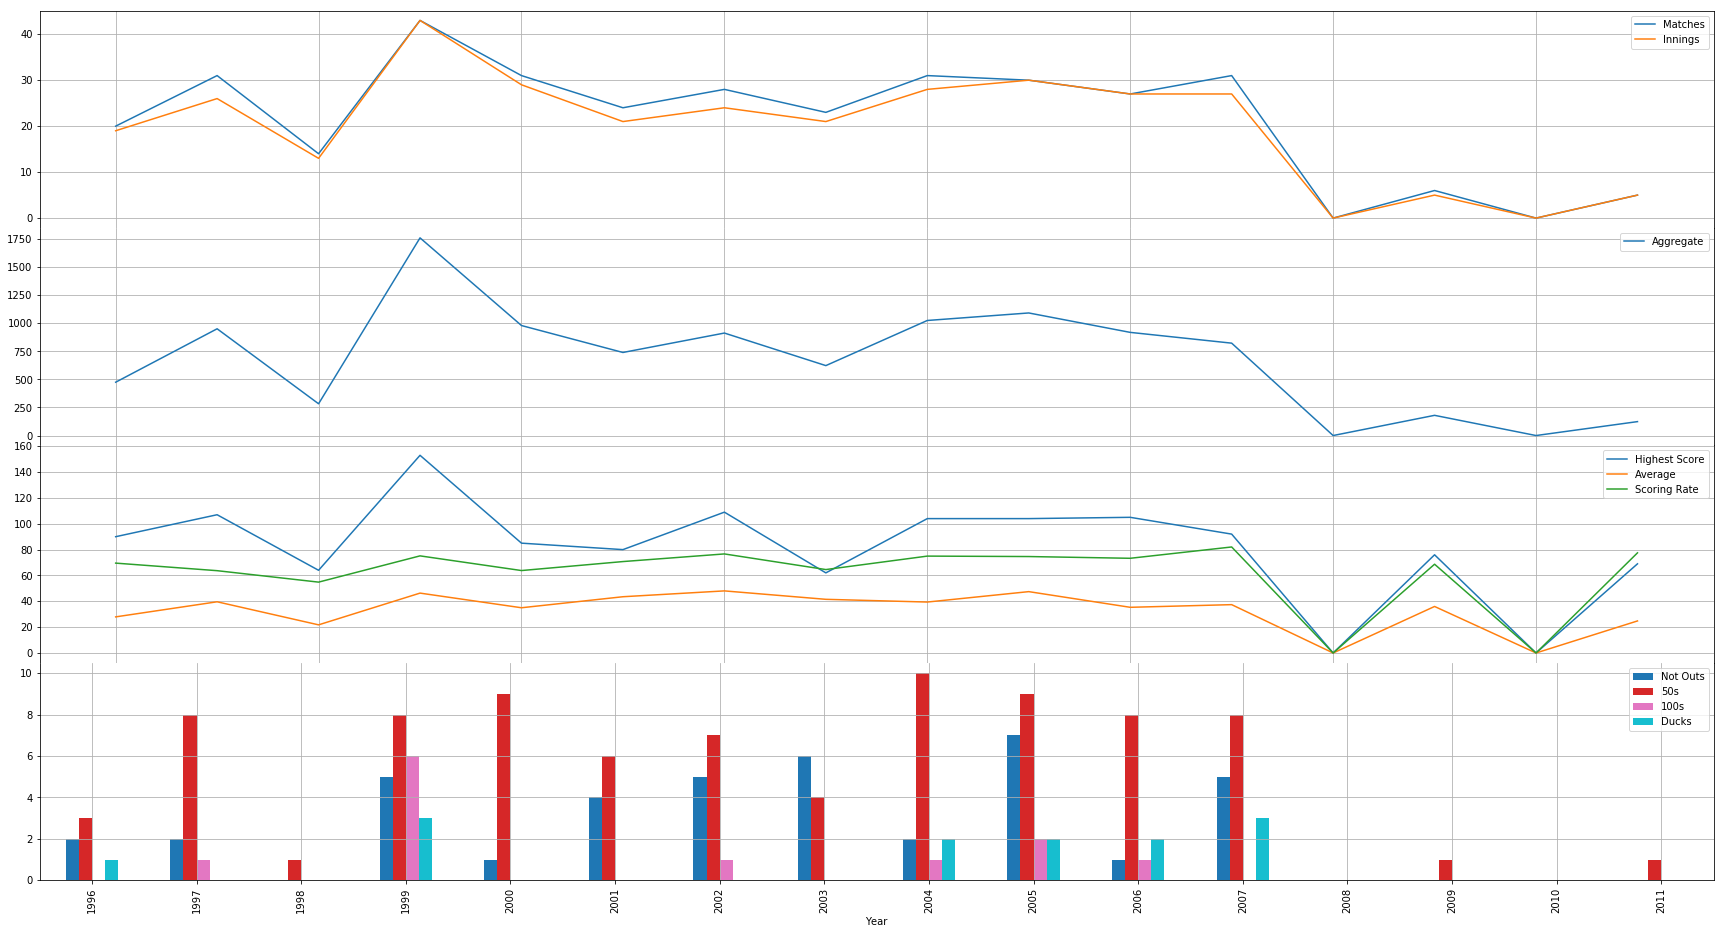

In [58]:
fig, ax = plt.subplots(figsize=(30, 16), nrows=4, ncols=1, frameon=False)
fig.subplots_adjust(hspace=0)
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[3].spines['top'].set_visible(False)
_[['Year', 'Matches', 'Innings']].plot.line(x='Year', ax=ax[0], grid=True)
_[['Year', 'Aggregate']].plot.line(x='Year', ax=ax[1], sharex=ax[0], grid=True)
_[['Year', 'Highest Score', 'Average', 'Scoring Rate']].plot.line(x='Year', ax=ax[2], sharex=ax[0], grid=True)
_[['Year', 'Not Outs', '50s', '100s', 'Ducks']].plot.bar(x='Year', colormap='tab10', ax=ax[3], sharex=ax[0], grid=True)
plt.savefig('../data/ODI-YearWise.png')